BAIXAR relatórios:

REGISTRO MENSAL DE ATENDIMENTOS DOS CRAS (RMA) – FORMULÁRIO DO CRAS

Variáveis do Bloco II – Atendimentos individualizados realizados no CRAS

C1 = Quantidade total de atendimentos particularizados realizados no CRAS no mês de referência


Código para baixar os endereços dos arquivos na página

In [1]:
import os

def baixar_arquivo(url, local_filename=None):
    """Baixa e salva o arquivo de uma url."""
    # Se o nome do arquivo não foi passado como parâmetro, extrair da url.
    if local_filename is None:
        local_filename = os.path.join("./data", url.split('/')[-1])

    #verifica se arquivo já foi baixado
    if os.path.exists(local_filename):
        print(f'Arquivo {local_filename} já baixado!')
        return None
    else:
        print('Solicitando arquivo do servidor.')
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(local_filename, 'wb') as f:
            print(f"Baixando arquivo da url: {url}")
            for chunk in response.iter_content(chunk_size=8192): 
                f.write(chunk)
            return "Arquivo baixado!"



In [2]:
def read_page(url):
    print(f'Fazendo requisição GET para o link: {url}')
    response = requests.get(url)
    response.raise_for_status() #Levanta uma exceção caso haja erro na requisição.
    
    if response.status_code == 200:
        content = response.text
        return content

Informar a página

In [3]:
import requests
from bs4 import BeautifulSoup
import time

TIME_TO_SLEEP = 120

url = 'https://aplicacoes.mds.gov.br/snas/vigilancia/index2.php'

content = read_page(url)
soup = BeautifulSoup(content, 'html.parser')

Fazendo requisição GET para o link: https://aplicacoes.mds.gov.br/snas/vigilancia/index2.php


Informar a marcação em que os endereços dos arquivos estão no HTML

In [4]:
 section = soup.find('body')
 links=section.find_all('a')
 

Todos os links da página

In [5]:
len(links)

171

In [6]:
links[10]

<a href="https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/8%20-%20POSTO%20DE%20CADASTRAMENTO.rar">POSTO DE CADASTRAMENTO</a>

Identificar apenas os links que possuem o termo CRAS

In [7]:
CRAS=[]

for item in links:
    link = item['href']
    term_link = link[75:83]
    if term_link == 'RMA_CRAS':
        CRAS.append(link)
        


In [8]:
CRAS

['https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2023_divulga%C3%A7%C3%A3o_030423.zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2022_divulga%C3%A7%C3%A3o_27_03_23.xlsx',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2021_divulga%C3%A7%C3%A3o.zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2020_divulga%C3%A7%C3%A3o(2).zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_NovoCriterios_2019_divulga%C3%A7%C3%A3o.zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_NovoCriterios_2018_divulga%C3%A7%C3%A3o.zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_NovoCriterios_2017_divulga%C3%A7%C3%A3o.zip',
 'https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/f

Pegar apenas o link de 2022 - segundo arquivo

In [9]:
for item in CRAS[1:2]:
    if baixar_arquivo(item):
        print('Esperando 120s para solicitar próximo download...')
        time.sleep(TIME_TO_SLEEP)
    else:
        print("Link para download não encontrado.")         

Arquivo ./data\RMA_CRAS_Criterios_2022_divulga%C3%A7%C3%A3o_27_03_23.xlsx já baixado!
Link para download não encontrado.


Descompactar o arquivo - ZIP na pasta data

In [10]:
#import os
#import zipfile

##caminho = os.getcwd()
#caminho = 'data'
#arquivos = os.listdir(caminho)

In [11]:
#for arquivo in arquivos:
#    if arquivo.endswith('.zip'):
#        caminho_completo = os.path.join(caminho, arquivo)
#
#        with zipfile.ZipFile(caminho_completo, 'r') as zip_ref:
#            zip_ref.extractall(caminho)

In [12]:
import pandas as pd 
caminho

NameError: name 'caminho' is not defined

In [ ]:
#arquivos=[]
#for file in os.listdir(caminho):
#    if file.endswith(".xlsx"):
#        print(f'Carregando arquivo {file} ...')
#        arquivos.append(pd.read_excel(os.path.join(caminho,file), sheet_name="Base tratada"))

Buscar apenas os arquivos terminados em XLSX na pasta data

In [13]:
import glob
caminho = 'data'
os.chdir(caminho)
arquivos2 = glob.glob('*.xlsx')


Juntar arquivos em um dataframe

In [14]:
arquivos2

['RMA_CRAS_Criterios_2022_divulga%C3%A7%C3%A3o_27_03_23.xlsx',
 'RMA_CRAS_Criterios_2023_divulgaç╞o_030423.xlsx']

Abrir apenas uma aba especifica do XLSX

In [15]:
tabelas=[]

for x in arquivos2:
    dados = pd.ExcelFile(x)
    print(f'Carregando arquivo {dados} ...')
    tabelas.append(pd.read_excel(dados,sheet_name="Base tratada"))

print('fim')
   
    

Carregando arquivo <pandas.io.excel._base.ExcelFile object at 0x0000026B1FC5E890> ...
Carregando arquivo <pandas.io.excel._base.ExcelFile object at 0x0000026B0963D350> ...
fim


In [16]:
len(tabelas)

2

In [17]:
tabela_final=pd.concat(tabelas)

In [18]:
tabela_final.head(2)

,data,mes_referencia,ano,mes,nome_unidade,NU_IDENTIFICADOR,endereco,municipio,uf,a1,...,d2_original,d3_original,d4_original,d5_original,d6_original,d7_original,d8_original,geral,Ind_duplicidade,trimestre
0,2022-01-01,01-01-2022,2022,1,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',30.0,...,0,0,0,0,0,0,0,1,Caso principal,1.0
1,2022-02-01,01-02-2022,2022,2,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',51.0,...,0,0,0,90,31,0,0,1,Caso principal,1.0


In [19]:
tabela_final.columns

Index(['data', 'mes_referencia', 'ano', 'mes', 'nome_unidade',
       'NU_IDENTIFICADOR', 'endereco', 'municipio', 'uf', 'a1', 'a2', 'b1',
       'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'IBGE', 'c7', 'c8', 'c9', 'd8',
       'IBGE7', 'Nome_UF', 'Região', 'Município', 'Pop_total_2010',
       'Pop_Urbana2010', 'Pop_Rural2010', 'areaKm2', 'Porte_pop2010',
       'a1_original', 'a2_original', 'b1_original', 'b2_original',
       'b3_original', 'b4_original', 'b5_original', 'b6_original',
       'c1_original', 'c2_original', 'c3_original', 'c4_original',
       'c5_original', 'c6_original', 'c7_original', 'c8_original',
       'c9_original', 'd1_original', 'd2_original', 'd3_original',
       'd4_original', 'd5_original', 'd6_original', 'd7_original',
       'd8_original', 'geral', 'Ind_duplicidade', 'trimestre'],
      dtype='object')

In [20]:
dados_municipio=tabela_final[['municipio', 'uf', 'IBGE','IBGE7','Nome_UF', 'Região', 'Município', 'Pop_total_2010', 'Pop_Urbana2010', 'Pop_Rural2010', 'areaKm2', 'Porte_pop2010']]

In [21]:
dados_municipio=dados_municipio.drop_duplicates(subset=['municipio','uf','IBGE','IBGE7'], keep='last')

In [22]:
dados_municipio

,municipio,uf,IBGE,IBGE7,Nome_UF,Região,Município,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
835,'FEIJO','AC',120030,1200302,12,1,Feijó,32412,16636,15776,27975.427,2
2303,'BONFIM','RR',140015,1400159,14,1,Bonfim,10943,3711,7232,8095.421,1
2315,'CANTA','RR',140017,1400175,14,1,Cantá,13902,2257,11645,7664.831,1
2359,'IRACEMA','RR',140028,1400282,14,1,Iracema,8696,4078,4618,14351.133,1
2397,'RORAINOPOLIS','RR',140047,1400472,14,1,Rorainópolis,24279,10673,13606,33596.525,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7835,'VIANOPOLIS','GO',522200,5222005,52,5,Vianópolis,12548,9170,3378,954.284,1
7836,'VICENTINOPOLIS','GO',522205,5222054,52,5,Vicentinópolis,7371,6321,1050,737.255,1
7837,'VILA BOA','GO',522220,5222203,52,5,Vila Boa,4735,3502,1233,1060.172,1
7839,'VILA PROPICIO','GO',522230,5222302,52,5,Vila Propício,5145,1504,3641,2181.583,1


Porte do municipio

In [23]:
url='https://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv'
porte=pd.read_csv(url, sep=";", encoding='Latin-1')

In [24]:
porte=porte[['IBGE','IBGE7','UF','Município','Região','População 2010','Porte']]

In [25]:
Dados_municipio_porte = pd.merge(porte, dados_municipio, how = 'left', 
                                 right_on=['IBGE7',],
                                 left_on=['IBGE7',])

In [26]:
Dados_municipio_porte.sort_values(by="IBGE_y")

,IBGE_x,IBGE7,UF,Município_x,Região_x,População 2010,Porte,municipio,uf,IBGE_y,Nome_UF,Região_y,Município_y,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,'ALTA FLORESTA DOESTE','RO',110001.0,11.0,1.0,Alta Floresta D'Oeste,24392.0,13970.0,10422.0,7067.025,2.0
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,'ARIQUEMES','RO',110002.0,11.0,1.0,Ariquemes,90353.0,76525.0,13828.0,4426.571,3.0
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,'CABIXI','RO',110003.0,11.0,1.0,Cabixi,6313.0,2693.0,3620.0,1314.353,1.0
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,'CACOAL','RO',110004.0,11.0,1.0,Cacoal,78574.0,61921.0,16653.0,3792.948,3.0
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,'CEREJEIRAS','RO',110005.0,11.0,1.0,Cerejeiras,17029.0,14419.0,2610.0,2783.300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,431700,4317004,RS,Santana da Boa Vista,Região Sul,8242.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4976,431725,4317251,RS,Santa Tereza,Região Sul,1720.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5056,432149,4321493,RS,Toropi,Região Sul,2952.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5076,432234,4322343,RS,Ubiretama,Região Sul,2296.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Municipios não encontrados no RMA 2022

In [27]:
MuncipiosFalta=Dados_municipio_porte[Dados_municipio_porte['municipio'].isna()]

In [28]:
MuncipiosFalta

,IBGE_x,IBGE7,UF,Município_x,Região_x,População 2010,Porte,municipio,uf,IBGE_y,Nome_UF,Região_y,Município_y,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
575,210730,2107308,MA,Nova Iorque,Região Nordeste,4590.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,210945,2109452,MA,Raposa,Região Nordeste,26327.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,220196,2201960,PI,Brasileira,Região Nordeste,7966.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,270130,2701308,AL,Cajueiro,Região Nordeste,20409.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,293280,2932804,BA,Utinga,Região Nordeste,18173.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2356,311040,3110400,MG,Camacho,Região Sudeste,3154.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,314040,3140407,MG,Marmelópolis,Região Sudeste,2968.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,350230,3502309,SP,Anhembi,Região Sudeste,5653.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,350670,3506706,SP,Boa Esperança do Sul,Região Sudeste,13645.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3364,350860,3508603,SP,Cachoeira Paulista,Região Sudeste,30091.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
MuncipiosFalta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 575 to 5092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IBGE_x          50 non-null     int64  
 1   IBGE7           50 non-null     int64  
 2   UF              50 non-null     object 
 3   Município_x     50 non-null     object 
 4   Região_x        50 non-null     object 
 5   População 2010  49 non-null     float64
 6   Porte           50 non-null     object 
 7   municipio       0 non-null      object 
 8   uf              0 non-null      object 
 9   IBGE_y          0 non-null      float64
 10  Nome_UF         0 non-null      float64
 11  Região_y        0 non-null      float64
 12  Município_y     0 non-null      object 
 13  Pop_total_2010  0 non-null      float64
 14  Pop_Urbana2010  0 non-null      float64
 15  Pop_Rural2010   0 non-null      float64
 16  areaKm2         0 non-null      float64
 17  Porte_pop2010   0 non-null      float6

In [30]:
RMA_mensal=tabela_final.loc[:,['ano', 'mes', 'municipio', 'uf', 'c1', 'c1_original', 'IBGE','IBGE7']]

In [31]:
RMA_mensal.head(2)

,ano,mes,municipio,uf,c1,c1_original,IBGE,IBGE7
0,2022,1,'ALTA FLORESTA DOESTE','RO',1218.0,1218,110001,1100015
1,2022,2,'ALTA FLORESTA DOESTE','RO',1280.0,1280,110001,1100015


In [32]:
RMA_mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107017 entries, 0 to 7862
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ano          107017 non-null  int64  
 1   mes          107017 non-null  int64  
 2   municipio    107017 non-null  object 
 3   uf           107017 non-null  object 
 4   c1           104526 non-null  float64
 5   c1_original  107017 non-null  int64  
 6   IBGE         107017 non-null  int64  
 7   IBGE7        107017 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 7.3+ MB


In [33]:
RMA_m_2022=RMA_mensal[(RMA_mensal['ano']==2022)]

In [34]:
RMA_m_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99154 entries, 0 to 99153
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          99154 non-null  int64  
 1   mes          99154 non-null  int64  
 2   municipio    99154 non-null  object 
 3   uf           99154 non-null  object 
 4   c1           96827 non-null  float64
 5   c1_original  99154 non-null  int64  
 6   IBGE         99154 non-null  int64  
 7   IBGE7        99154 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.8+ MB


In [35]:
RMA_2022_0=RMA_m_2022.groupby(['ano','mes','municipio','uf','IBGE','IBGE7']).sum().reset_index()

In [36]:
RMA_2022_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64010 entries, 0 to 64009
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          64010 non-null  int64  
 1   mes          64010 non-null  int64  
 2   municipio    64010 non-null  object 
 3   uf           64010 non-null  object 
 4   IBGE         64010 non-null  int64  
 5   IBGE7        64010 non-null  int64  
 6   c1           64010 non-null  float64
 7   c1_original  64010 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.9+ MB


In [37]:
RMA_2022_soma=RMA_2022_0.groupby(['ano','municipio','uf','IBGE','IBGE7']).sum().reset_index()
RMA_2022_soma=RMA_2022_soma.rename(columns={'c1':'soma_c1', 'c1_original':'soma_c1_original', }).drop(columns={'mes'})
RMA_2022_media=RMA_2022_0.groupby(['ano','municipio','uf','IBGE','IBGE7']).mean().round(1).reset_index()
RMA_2022_media=RMA_2022_media.rename(columns={'c1':'media_c1', 'c1_original':'media_c1_original', }).drop(columns={'mes'})

In [38]:
RMA_2022_media.tail()

,ano,municipio,uf,IBGE,IBGE7,media_c1,media_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,345.3,345.3
5514,2022,'ZABELE','PB',251740,2517407,80.1,80.1
5515,2022,'ZACARIAS','SP',355715,3557154,76.8,76.8
5516,2022,'ZE DOCA','MA',211400,2114007,398.2,9728.2
5517,2022,'ZORTEA','SC',421985,4219853,192.2,192.2


In [39]:
RMA_2022_soma.tail()

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144
5514,2022,'ZABELE','PB',251740,2517407,961.0,961
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738
5517,2022,'ZORTEA','SC',421985,4219853,2306.0,2306


In [40]:
RMA_2022=pd.merge(RMA_2022_soma,RMA_2022_media, how = 'inner', 
                  right_on=['ano', 'municipio','IBGE7','IBGE','uf'],
                  left_on=['ano', 'municipio','IBGE7','IBGE','uf'])
RMA_2022.tail()

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2
5517,2022,'ZORTEA','SC',421985,4219853,2306.0,2306,192.2,192.2


In [41]:
RMA_2022[(RMA_2022['IBGE']==530010)]

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original
746,2022,'BRASILIA','DF',530010,5300108,300262.0,300262,27296.5,27296.5


In [42]:
RMA_m_2022_CRAS=tabela_final.loc[:,['ano', 'mes', 'municipio','NU_IDENTIFICADOR', 'uf', 'IBGE','IBGE7']]
RMA_m_2022_CRAS=RMA_m_2022_CRAS[(RMA_m_2022_CRAS['ano']==2022)]
RMA_m_2022_CRAS

,ano,mes,municipio,NU_IDENTIFICADOR,uf,IBGE,IBGE7
0,2022,1,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
1,2022,2,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
2,2022,3,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
3,2022,4,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
4,2022,5,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
...,...,...,...,...,...,...,...
99149,2022,8,'BRASILIA','53001039867','DF',530010,5300108
99150,2022,9,'BRASILIA','53001039867','DF',530010,5300108
99151,2022,10,'BRASILIA','53001039867','DF',530010,5300108
99152,2022,11,'BRASILIA','53001039867','DF',530010,5300108


In [43]:
RMA_m_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','mes','municipio','uf','IBGE','IBGE7'])['NU_IDENTIFICADOR'].agg(['count']).reset_index()
RMA_m_2022_CRAS

,ano,mes,municipio,uf,IBGE,IBGE7,count
0,2022,1,'ABADIA DE GOIAS','GO',520005,5200050,1
1,2022,1,'ABADIA DOS DOURADOS','MG',310010,3100104,1
2,2022,1,'ABADIANIA','GO',520010,5200100,1
3,2022,1,'ABAETE','MG',310020,3100203,1
4,2022,1,'ABAETETUBA','PA',150010,1500107,8
...,...,...,...,...,...,...,...
64005,2022,12,'XIQUE-XIQUE','BA',293360,2933604,2
64006,2022,12,'ZABELE','PB',251740,2517407,1
64007,2022,12,'ZACARIAS','SP',355715,3557154,1
64008,2022,12,'ZE DOCA','MA',211400,2114007,2


In [44]:
RMA_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','municipio','uf','IBGE','IBGE7'])['count'].agg(['max']).reset_index()
RMA_2022_CRAS=RMA_2022_CRAS.rename(columns={'max':'total_max_CRAS'})

In [45]:
RMA_2022_CRAS

,ano,municipio,uf,IBGE,IBGE7,total_max_CRAS
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,1
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1
2,2022,'ABADIANIA','GO',520010,5200100,1
3,2022,'ABAETE','MG',310020,3100203,1
4,2022,'ABAETETUBA','PA',150010,1500107,8
...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,2
5514,2022,'ZABELE','PB',251740,2517407,1
5515,2022,'ZACARIAS','SP',355715,3557154,1
5516,2022,'ZE DOCA','MA',211400,2114007,2


Consistencia numero de CRAS

In [46]:
RMA_m_2022_CRAS[(RMA_m_2022_CRAS['IBGE']==530010)]

,ano,mes,municipio,uf,IBGE,IBGE7,count
723,2022,1,'BRASILIA','DF',530010,5300108,27
6087,2022,2,'BRASILIA','DF',530010,5300108,27
11473,2022,3,'BRASILIA','DF',530010,5300108,27
16802,2022,4,'BRASILIA','DF',530010,5300108,27
22200,2022,5,'BRASILIA','DF',530010,5300108,26
27513,2022,6,'BRASILIA','DF',530010,5300108,20
37966,2022,8,'BRASILIA','DF',530010,5300108,29
43419,2022,9,'BRASILIA','DF',530010,5300108,26
48814,2022,10,'BRASILIA','DF',530010,5300108,25
54158,2022,11,'BRASILIA','DF',530010,5300108,25


In [47]:
RMA_2022_CRAS[(RMA_2022_CRAS['IBGE']==530010)]


,ano,municipio,uf,IBGE,IBGE7,total_max_CRAS
746,2022,'BRASILIA','DF',530010,5300108,29


In [48]:
RMA_mensal=tabela_final[['ano', 'mes', 'municipio', 'uf', 'c1', 'c1_original', 'IBGE','IBGE7']]

In [49]:
RMA_m_12_2022=RMA_mensal[((RMA_mensal['mes']==12) & (RMA_mensal['ano']==2022))]
RMA_m_12_2022

,ano,mes,municipio,uf,c1,c1_original,IBGE,IBGE7
11,2022,12,'ALTA FLORESTA DOESTE','RO',522.0,522,110001,1100015
23,2022,12,'ARIQUEMES','RO',611.0,611,110002,1100023
35,2022,12,'CABIXI','RO',128.0,128,110003,1100031
47,2022,12,'CACOAL','RO',242.0,242,110004,1100049
59,2022,12,'CEREJEIRAS','RO',175.0,175,110005,1100056
...,...,...,...,...,...,...,...,...
99125,2022,12,'BRASILIA','DF',203.0,203,530010,5300108
99136,2022,12,'BRASILIA','DF',610.0,610,530010,5300108
99144,2022,12,'BRASILIA','DF',641.0,641,530010,5300108
99148,2022,12,'BRASILIA','DF',946.0,946,530010,5300108


In [50]:
RMA_m_12_2022=RMA_m_12_2022.groupby(['municipio','uf','IBGE','IBGE7']).sum().reset_index()
RMA_m_12_2022=RMA_m_12_2022.rename(columns={'c1':'c1_DEZ_2022','c1_original':'c1_original_DEZ_2022'})
RMA_m_12_2022=RMA_m_12_2022.drop(columns={'ano','mes'})
RMA_m_12_2022

,municipio,uf,IBGE,IBGE7,c1_DEZ_2022,c1_original_DEZ_2022
0,'ABADIA DOS DOURADOS','MG',310010,3100104,80.0,80
1,'ABADIANIA','GO',520010,5200100,77.0,77
2,'ABAETE','MG',310020,3100203,702.0,702
3,'ABAETETUBA','PA',150010,1500107,1847.0,1847
4,'ABAIARA','CE',230010,2300101,111.0,111
...,...,...,...,...,...,...
5303,'XIQUE-XIQUE','BA',293360,2933604,195.0,195
5304,'ZABELE','PB',251740,2517407,23.0,23
5305,'ZACARIAS','SP',355715,3557154,42.0,42
5306,'ZE DOCA','MA',211400,2114007,0.0,14748


In [51]:
RMAcompleto0 = pd.merge(RMA_2022, RMA_2022_CRAS, how = 'left')

In [52]:
RMAcompleto0 

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,6860.0,10393,623.6,944.8,1
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1441.0,1441,120.1,120.1,1
2,2022,'ABADIANIA','GO',520010,5200100,1869.0,1869,155.8,155.8,1
3,2022,'ABAETE','MG',310020,3100203,6640.0,6640,553.3,553.3,1
4,2022,'ABAETETUBA','PA',150010,1500107,26806.0,26806,2233.8,2233.8,8
...,...,...,...,...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3,2
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1,1
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8,1
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2,2


In [53]:
RMAcompleto= pd.merge(RMAcompleto0, RMA_m_12_2022,how='left')
RMAcompleto

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,6860.0,10393,623.6,944.8,1,NaN,NaN
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1441.0,1441,120.1,120.1,1,80.0,80.0
2,2022,'ABADIANIA','GO',520010,5200100,1869.0,1869,155.8,155.8,1,77.0,77.0
3,2022,'ABAETE','MG',310020,3100203,6640.0,6640,553.3,553.3,1,702.0,702.0
4,2022,'ABAETETUBA','PA',150010,1500107,26806.0,26806,2233.8,2233.8,8,1847.0,1847.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3,2,195.0,195.0
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1,1,23.0,23.0
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8,1,42.0,42.0
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2,2,0.0,14748.0


In [54]:
RMAcompleto[(RMAcompleto['IBGE']==530010)]

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
746,2022,'BRASILIA','DF',530010,5300108,300262.0,300262,27296.5,27296.5,29,27645.0,27645.0


In [55]:
RMAcompleto.sort_values(by=['soma_c1'], ascending=False)

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4166,2022,'RIO DE JANEIRO','RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0
4809,2022,'SAO PAULO','SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0
1818,2022,'FORTALEZA','CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0
1493,2022,'CURITIBA','PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0
2856,2022,'MANAUS','AM',130260,1302603,350503.0,355518,29208.6,29626.5,20,20485.0,20485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2022,'DIRCEU ARCOVERDE','PI',220335,2203354,0.0,14025,0.0,1168.8,1,0.0,1336.0
4519,2022,'SANTO ANTONIO DO SUDOESTE','PR',412440,4124400,0.0,18509,0.0,1542.4,1,0.0,1179.0
4125,2022,'RIBEIRAO BONITO','SP',354290,3542909,0.0,0,0.0,0.0,1,NaN,NaN
5173,2022,'TERRA ROXA','PR',412740,4127403,0.0,22835,0.0,1902.9,1,0.0,2439.0


In [56]:
RMAcompleto_Nulos=RMAcompleto[(RMAcompleto['soma_c1_original'] == 0 )].sort_values(by=['soma_c1_original'], ascending=False)

In [57]:
RMAcompleto_Nulos

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4125,2022,'RIBEIRAO BONITO','SP',354290,3542909,0.0,0,0.0,0.0,1,NaN,NaN


In [58]:
RMAcompleto_nao_Nulos=RMAcompleto[(RMAcompleto['soma_c1_original'] != 0 )].sort_values(by=['soma_c1_original'], ascending=False)          

In [59]:
RMAcompleto_nao_Nulos

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4166,2022,'RIO DE JANEIRO','RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0
1818,2022,'FORTALEZA','CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0
4809,2022,'SAO PAULO','SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0
3299,2022,'NOVA IGUACU','RJ',330350,3303500,95299.0,527244,7941.6,43937.0,10,9949.0,34348.0
1493,2022,'CURITIBA','PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,2022,'ITOBI','SP',352380,3523800,42.0,42,8.4,8.4,1,NaN,NaN
676,2022,'BOM JESUS DO OESTE','SC',420257,4202578,36.0,36,36.0,36.0,1,36.0,36.0
4370,2022,'SANTA JULIANA','MG',315770,3157708,35.0,35,7.0,7.0,1,NaN,NaN
5052,2022,'SULINA','PR',412665,4126652,32.0,32,32.0,32.0,1,32.0,32.0


In [60]:
RMA_2022_porte=pd.merge(RMAcompleto_nao_Nulos,Dados_municipio_porte, 
                        how = 'inner')

In [61]:
RMA_2022_porte.columns

Index(['ano', 'municipio', 'uf', 'IBGE', 'IBGE7', 'soma_c1',
       'soma_c1_original', 'media_c1', 'media_c1_original', 'total_max_CRAS',
       'c1_DEZ_2022', 'c1_original_DEZ_2022', 'IBGE_x', 'UF', 'Município_x',
       'Região_x', 'População 2010', 'Porte', 'IBGE_y', 'Nome_UF', 'Região_y',
       'Município_y', 'Pop_total_2010', 'Pop_Urbana2010', 'Pop_Rural2010',
       'areaKm2', 'Porte_pop2010'],
      dtype='object')

In [62]:
RMA_TOTAL_2022=RMA_2022_porte[['ano', 'municipio','Município_x', 'uf', 'IBGE', 'IBGE7', 'soma_c1',
       'soma_c1_original', 'media_c1', 'media_c1_original', 'total_max_CRAS',
       'c1_DEZ_2022', 'c1_original_DEZ_2022', 'Porte']]

In [63]:
RMA_TOTAL_2022=RMA_TOTAL_2022.rename(columns={'IBGE':'ibge_6',	'IBGE7':'ibge_7','Município_x':'municipio_aj','uf':'uf',	
                                              'total_max_CRAS':'total_max_cras','Porte':'porte',
                                             'c1_DEZ_2022': 'c1_dez_2022', 'c1_original_DEZ_2022':'c1_original_dez_2022'})

In [64]:
RMA_TOTAL_2022

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
0,2022,'RIO DE JANEIRO',Rio de Janeiro,'RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0,Metrópole
1,2022,'FORTALEZA',Fortaleza,'CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0,Metrópole
2,2022,'SAO PAULO',São Paulo,'SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0,Metrópole
3,2022,'NOVA IGUACU',Nova Iguaçu,'RJ',330350,3303500,95299.0,527244,7941.6,43937.0,10,9949.0,34348.0,Grande
4,2022,'CURITIBA',Curitiba,'PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0,Metrópole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,'ITOBI',Itobi,'SP',352380,3523800,42.0,42,8.4,8.4,1,NaN,NaN,Pequeno I
5513,2022,'BOM JESUS DO OESTE',Bom Jesus do Oeste,'SC',420257,4202578,36.0,36,36.0,36.0,1,36.0,36.0,Pequeno I
5514,2022,'SANTA JULIANA',Santa Juliana,'MG',315770,3157708,35.0,35,7.0,7.0,1,NaN,NaN,Pequeno I
5515,2022,'SULINA',Sulina,'PR',412665,4126652,32.0,32,32.0,32.0,1,32.0,32.0,Pequeno I


10 maiores RMA

In [65]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=False)[0:10]

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
0,2022,'RIO DE JANEIRO',Rio de Janeiro,'RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0,Metrópole
2,2022,'SAO PAULO',São Paulo,'SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0,Metrópole
1,2022,'FORTALEZA',Fortaleza,'CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0,Metrópole
4,2022,'CURITIBA',Curitiba,'PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0,Metrópole
7,2022,'MANAUS',Manaus,'AM',130260,1302603,350503.0,355518,29208.6,29626.5,20,20485.0,20485.0,Metrópole
5,2022,'TERESINA',Teresina,'PI',221100,2211001,322554.0,463724,26879.5,38643.7,19,29682.0,29682.0,Grande
6,2022,'CAMPO GRANDE',Campo Grande,'MS',500270,5002704,309265.0,362750,25772.1,30229.2,21,22377.0,29431.0,Grande
8,2022,'GUARULHOS',Guarulhos,'SP',351880,3518800,305394.0,348166,25449.5,29013.8,12,19651.0,19651.0,Metrópole
12,2022,'SAO LUIS',São Luís,'MA',211130,2111300,300974.0,300974,25081.2,25081.2,20,11802.0,11802.0,Metrópole
13,2022,'BRASILIA',Brasília,'DF',530010,5300108,300262.0,300262,27296.5,27296.5,29,27645.0,27645.0,Metrópole


10 menores RMA

In [66]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=True)[0:10]

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
352,2022,'TERRA ROXA',Terra Roxa,'PR',412740,4127403,0.0,22835,0.0,1902.9,1,0.0,2439.0,Pequeno I
359,2022,'PINDORETAMA',Pindoretama,'CE',231085,2310852,0.0,22499,0.0,1874.9,1,0.0,1087.0,Pequeno I
362,2022,'IBIRACI',Ibiraci,'MG',312970,3129707,0.0,22101,0.0,1841.8,1,0.0,1330.0,Pequeno I
417,2022,'NONOAI',Nonoai,'RS',431270,4312708,0.0,19021,0.0,1585.1,1,0.0,1256.0,Pequeno I
418,2022,'HULHA NEGRA',Hulha Negra,'RS',430965,4309654,0.0,18987,0.0,1582.2,1,0.0,1504.0,Pequeno I
324,2022,'COSTA RICA',Costa Rica,'MS',500325,5003256,0.0,25179,0.0,2797.7,1,0.0,1976.0,Pequeno I
430,2022,'SANTO ANTONIO DO SUDOESTE',Santo Antônio do Sudoeste,'PR',412440,4124400,0.0,18509,0.0,1542.4,1,0.0,1179.0,Pequeno I
314,2022,'IPIRANGA',Ipiranga,'PR',411050,4110508,0.0,25534,0.0,2127.8,1,0.0,2380.0,Pequeno I
301,2022,'CAMOCIM DE SAO FELIX',Camocim de São Félix,'PE',260350,2603504,0.0,26386,0.0,2198.8,1,0.0,1730.0,Pequeno I
289,2022,'BOTELHOS',Botelhos,'MG',310840,3108404,0.0,27092,0.0,2257.7,1,0.0,2237.0,Pequeno I


In [67]:
RMA_TOTAL_2022.describe()

,ano,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022
count,5517.0,5517.000000,5.517000e+03,5.517000e+03,5.517000e+03,5517.000000,5517.000000,5517.000000,5308.000000,5308.000000
mean,2022.0,324816.306688,3.248168e+06,7.524176e+03,8.796842e+03,635.092641,741.943484,1.546674,556.119442,637.849096
std,0.0,98630.854234,9.863085e+05,3.243293e+04,4.186080e+04,2707.583163,3492.509253,2.064375,2458.130052,2745.205607
min,2022.0,110001.000000,1.100015e+06,0.000000e+00,1.300000e+01,0.000000,2.600000,1.000000,0.000000,0.000000
25%,2022.0,251130.000000,2.511301e+06,1.182000e+03,1.204000e+03,103.600000,106.100000,1.000000,68.000000,73.000000
50%,2022.0,314500.000000,3.145000e+06,2.450000e+03,2.554000e+03,211.800000,220.200000,1.000000,159.000000,170.000000
75%,2022.0,411800.000000,4.118006e+06,5.211000e+03,5.773000e+03,443.600000,489.600000,1.000000,396.000000,435.250000
max,2022.0,530010.000000,5.300108e+06,1.455179e+06,2.097010e+06,121264.900000,174750.800000,54.000000,104711.000000,111090.000000


In [68]:
RMA_TOTAL_2022.to_csv('RMA_TOTAL_2022.csv',encoding = 'UTF-8')

In [69]:
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

In [70]:
cad_2022=pd.read_csv(url_cad_2022, sep=",", encoding='Latin-1')

In [71]:
cad_2022

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202212,4900,12695,3231,9574,758,2503,1063,3005,1821,5508
1,110002,202212,16852,39857,12160,32098,3131,8917,3467,8743,6598,17660
2,110003,202212,910,2504,648,1990,161,523,145,385,306,908
3,110004,202212,17295,40718,11791,31406,2614,7373,4150,10481,6764,17854
4,110005,202212,3131,7631,2202,6139,517,1451,678,1965,1195,3416
...,...,...,...,...,...,...,...,...,...,...,...,...
66835,522200,202201,1913,5135,1375,4190,331,1032,321,990,652,2022
66836,522205,202201,1847,4260,1390,3644,187,484,807,2133,994,2617
66837,522220,202201,1410,3276,1058,2786,104,274,713,1923,817,2197
66838,522230,202201,1371,3273,1115,2910,169,513,647,1683,816,2196


In [72]:
cad_2022.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [73]:
cad_2022['total_bx_renda'] = cad_2022['cadunico_tot_pes_rpc_ate_meio_sm']-cad_2022['cadunico_tot_pes_pob_e_ext_pob']


In [74]:
cad_2022.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob',
       'total_bx_renda'],
      dtype='object')

In [75]:
cad_2022=cad_2022.rename(columns={'ibge':'ibge_6', 
                             'cadunico_tot_pes':'tot_pes','cadunico_tot_pes_rpc_ate_meio_sm':'tot_pes_rpc_ate_meio_sm', 
                             'cadunico_tot_pes_pob':'tot_pes_pob','cadunico_tot_pes_ext_pob':'tot_pes_ext_pob', 
                             'cadunico_tot_pes_pob_e_ext_pob':'tot_pes_pob_e_ext_pob','total_bx_renda':'tot_bx_renda'})

In [76]:
cad_2022

,ibge_6,anomes,cadunico_tot_fam,tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,tot_pes_pob,cadunico_tot_fam_ext_pob,tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,tot_pes_pob_e_ext_pob,tot_bx_renda
0,110001,202212,4900,12695,3231,9574,758,2503,1063,3005,1821,5508,4066
1,110002,202212,16852,39857,12160,32098,3131,8917,3467,8743,6598,17660,14438
2,110003,202212,910,2504,648,1990,161,523,145,385,306,908,1082
3,110004,202212,17295,40718,11791,31406,2614,7373,4150,10481,6764,17854,13552
4,110005,202212,3131,7631,2202,6139,517,1451,678,1965,1195,3416,2723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66835,522200,202201,1913,5135,1375,4190,331,1032,321,990,652,2022,2168
66836,522205,202201,1847,4260,1390,3644,187,484,807,2133,994,2617,1027
66837,522220,202201,1410,3276,1058,2786,104,274,713,1923,817,2197,589
66838,522230,202201,1371,3273,1115,2910,169,513,647,1683,816,2196,714


In [77]:
cad_2022_Ano=cad_2022[['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob','tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda']]

In [78]:
cad_2022_Ano

,ibge_6,anomes,tot_pes,tot_pes_rpc_ate_meio_sm,tot_pes_pob,tot_pes_ext_pob,tot_pes_pob_e_ext_pob,tot_bx_renda
0,110001,202212,12695,9574,2503,3005,5508,4066
1,110002,202212,39857,32098,8917,8743,17660,14438
2,110003,202212,2504,1990,523,385,908,1082
3,110004,202212,40718,31406,7373,10481,17854,13552
4,110005,202212,7631,6139,1451,1965,3416,2723
...,...,...,...,...,...,...,...,...
66835,522200,202201,5135,4190,1032,990,2022,2168
66836,522205,202201,4260,3644,484,2133,2617,1027
66837,522220,202201,3276,2786,274,1923,2197,589
66838,522230,202201,3273,2910,513,1683,2196,714


In [79]:
cad_2022_Soma=cad_2022_Ano.groupby(by=['ibge_6']).sum()

In [80]:
cad_2022_Soma.columns

Index(['anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [81]:
cad_2022_Soma=cad_2022_Soma.rename(columns={'tot_pes':'Soma_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Soma_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Soma_tot_pes_pob',
                                    'tot_pes_ext_pob':'Soma_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Soma_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Soma_tot_bx_renda'})

In [82]:
cad_2022_Soma_=cad_2022_Soma.drop(columns={'anomes'}).reset_index()

In [83]:
cad_2022_Soma_

,ibge_6,Soma_tot_pes,Soma_tot_pes_rpc_ate_meio_sm,Soma_tot_pes_pob,Soma_pes_ext_pob,Soma_tot_pes_pob_e_ext_pob,Soma_tot_bx_renda
0,110001,146191,112565,28030,40349,68379,44186
1,110002,467223,382633,103071,114193,217264,165369
2,110003,27618,22316,5995,6139,12134,10182
3,110004,449973,351357,76819,120968,197787,153570
4,110005,86764,70449,14574,23988,38562,31887
...,...,...,...,...,...,...,...
5565,522200,70416,57608,14917,16810,31727,25881
5566,522205,53130,44304,10852,18195,29047,15257
5567,522220,38652,32518,3567,21329,24896,7622
5568,522230,42270,36665,6745,20892,27637,9028


In [84]:
cad_2022_Media=cad_2022_Ano.groupby(by=['ibge_6']).mean().round(2)

In [85]:
cad_2022_Media.columns

Index(['anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [86]:
cad_2022_Media=cad_2022_Media.rename(columns={'tot_pes':'Media_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Media_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Media_tot_pes_pob',
                                    'tot_pes_ext_pob':'Media_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Media_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Media_tot_bx_renda'})

In [87]:
cad_2022_Media=cad_2022_Media.drop(columns={'anomes'}).reset_index()

In [88]:
cad_2022_Media

,ibge_6,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,Media_tot_pes_pob,Media_pes_ext_pob,Media_tot_pes_pob_e_ext_pob,Media_tot_bx_renda
0,110001,12182.58,9380.42,2335.83,3362.42,5698.25,3682.17
1,110002,38935.25,31886.08,8589.25,9516.08,18105.33,13780.75
2,110003,2301.50,1859.67,499.58,511.58,1011.17,848.50
3,110004,37497.75,29279.75,6401.58,10080.67,16482.25,12797.50
4,110005,7230.33,5870.75,1214.50,1999.00,3213.50,2657.25
...,...,...,...,...,...,...,...
5565,522200,5868.00,4800.67,1243.08,1400.83,2643.92,2156.75
5566,522205,4427.50,3692.00,904.33,1516.25,2420.58,1271.42
5567,522220,3221.00,2709.83,297.25,1777.42,2074.67,635.17
5568,522230,3522.50,3055.42,562.08,1741.00,2303.08,752.33


In [89]:
cad_2022_Dez=cad_2022_Ano[(cad_2022_Ano['anomes']== 202212)]

In [90]:
cad_2022_Dez.columns

Index(['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [91]:
cad_2022_Dez=cad_2022_Dez.rename(columns={'tot_pes':'Dez_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Dez_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Dez_tot_pes_pob',
                                    'tot_pes_ext_pob':'Dez_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Dez_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Dez_tot_bx_renda'})

In [92]:
cad_2022_Dez=cad_2022_Dez.drop(columns={'anomes'})

In [93]:
cad_2022_Dez

,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda
0,110001,12695,9574,2503,3005,5508,4066
1,110002,39857,32098,8917,8743,17660,14438
2,110003,2504,1990,523,385,908,1082
3,110004,40718,31406,7373,10481,17854,13552
4,110005,7631,6139,1451,1965,3416,2723
...,...,...,...,...,...,...,...
5565,522200,6440,5257,1363,1759,3122,2135
5566,522205,4557,3693,1198,981,2179,1514
5567,522220,3187,2657,327,1627,1954,703
5568,522230,3679,3134,521,1826,2347,787


In [94]:
cad2022_0=pd.merge(cad_2022_Dez,cad_2022_Media, how = 'inner', right_on='ibge_6',left_on='ibge_6').reset_index()

In [95]:
cad2022=pd.merge(cad2022_0,cad_2022_Soma_, how = 'inner', right_on='ibge_6',left_on='ibge_6')

In [96]:
cad2022

,index,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,Media_tot_pes_pob,Media_pes_ext_pob,Media_tot_pes_pob_e_ext_pob,Media_tot_bx_renda,Soma_tot_pes,Soma_tot_pes_rpc_ate_meio_sm,Soma_tot_pes_pob,Soma_pes_ext_pob,Soma_tot_pes_pob_e_ext_pob,Soma_tot_bx_renda
0,0,110001,12695,9574,2503,3005,5508,4066,12182.58,9380.42,2335.83,3362.42,5698.25,3682.17,146191,112565,28030,40349,68379,44186
1,1,110002,39857,32098,8917,8743,17660,14438,38935.25,31886.08,8589.25,9516.08,18105.33,13780.75,467223,382633,103071,114193,217264,165369
2,2,110003,2504,1990,523,385,908,1082,2301.50,1859.67,499.58,511.58,1011.17,848.50,27618,22316,5995,6139,12134,10182
3,3,110004,40718,31406,7373,10481,17854,13552,37497.75,29279.75,6401.58,10080.67,16482.25,12797.50,449973,351357,76819,120968,197787,153570
4,4,110005,7631,6139,1451,1965,3416,2723,7230.33,5870.75,1214.50,1999.00,3213.50,2657.25,86764,70449,14574,23988,38562,31887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5565,522200,6440,5257,1363,1759,3122,2135,5868.00,4800.67,1243.08,1400.83,2643.92,2156.75,70416,57608,14917,16810,31727,25881
5566,5566,522205,4557,3693,1198,981,2179,1514,4427.50,3692.00,904.33,1516.25,2420.58,1271.42,53130,44304,10852,18195,29047,15257
5567,5567,522220,3187,2657,327,1627,1954,703,3221.00,2709.83,297.25,1777.42,2074.67,635.17,38652,32518,3567,21329,24896,7622
5568,5568,522230,3679,3134,521,1826,2347,787,3522.50,3055.42,562.08,1741.00,2303.08,752.33,42270,36665,6745,20892,27637,9028


In [97]:
RMA_2022_comparativo=pd.merge(cad2022,RMA_TOTAL_2022, how = 'inner', right_on='ibge_6',left_on='ibge_6')

In [98]:
RMA_2022_comparativo

,index,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,...,uf,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
0,0,110001,12695,9574,2503,3005,5508,4066,12182.58,9380.42,...,'RO',1100015,14165.0,14165,1180.4,1180.4,1,522.0,522.0,Pequeno II
1,1,110002,39857,32098,8917,8743,17660,14438,38935.25,31886.08,...,'RO',1100023,15515.0,15515,1292.9,1292.9,1,611.0,611.0,Médio
2,2,110003,2504,1990,523,385,908,1082,2301.50,1859.67,...,'RO',1100031,1837.0,1837,153.1,153.1,1,128.0,128.0,Pequeno I
3,3,110004,40718,31406,7373,10481,17854,13552,37497.75,29279.75,...,'RO',1100049,4709.0,8495,392.4,707.9,1,242.0,242.0,Médio
4,4,110005,7631,6139,1451,1965,3416,2723,7230.33,5870.75,...,'RO',1100056,2140.0,4153,178.3,346.1,1,175.0,175.0,Pequeno I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,5565,522200,6440,5257,1363,1759,3122,2135,5868.00,4800.67,...,'GO',5222005,129.0,129,10.8,10.8,1,4.0,4.0,Pequeno I
5513,5566,522205,4557,3693,1198,981,2179,1514,4427.50,3692.00,...,'GO',5222054,2444.0,2444,222.2,222.2,1,174.0,174.0,Pequeno I
5514,5567,522220,3187,2657,327,1627,1954,703,3221.00,2709.83,...,'GO',5222203,6078.0,6078,506.5,506.5,1,500.0,500.0,Pequeno I
5515,5568,522230,3679,3134,521,1826,2347,787,3522.50,3055.42,...,'GO',5222302,705.0,705,58.8,58.8,2,46.0,46.0,Pequeno I


In [99]:
RMA_2022_comparativo.columns

Index(['index', 'ibge_6', 'Dez_tot_pes', 'Dez_tot_pes_rpc_ate_meio_sm',
       'Dez_tot_pes_pob', 'Dez_pes_ext_pob', 'Dez_tot_pes_pob_e_ext_pob',
       'Dez_tot_bx_renda', 'Media_tot_pes', 'Media_tot_pes_rpc_ate_meio_sm',
       'Media_tot_pes_pob', 'Media_pes_ext_pob', 'Media_tot_pes_pob_e_ext_pob',
       'Media_tot_bx_renda', 'Soma_tot_pes', 'Soma_tot_pes_rpc_ate_meio_sm',
       'Soma_tot_pes_pob', 'Soma_pes_ext_pob', 'Soma_tot_pes_pob_e_ext_pob',
       'Soma_tot_bx_renda', 'ano', 'municipio', 'municipio_aj', 'uf', 'ibge_7',
       'soma_c1', 'soma_c1_original', 'media_c1', 'media_c1_original',
       'total_max_cras', 'c1_dez_2022', 'c1_original_dez_2022', 'porte'],
      dtype='object')

In [128]:
RMA_2022_comparativo_media=RMA_2022_comparativo[['municipio_aj', 'ibge_7','soma_c1','media_c1', 'Dez_tot_pes_pob_e_ext_pob','porte']]
RMA_2022_comparativo_media=RMA_2022_comparativo_media[(RMA_2022_comparativo_media['media_c1']!=0)]
RMA_2022_comparativo_media.describe()

,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
count,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03
mean,3.247257e+06,7.546061e+03,636.939847,1.087671e+04
std,9.866307e+05,3.247753e+04,2711.301601,4.601920e+04
min,1.100015e+06,1.300000e+01,2.600000,8.000000e+00
25%,2.511103e+06,1.188000e+03,104.600000,1.557000e+03
50%,3.145000e+06,2.463000e+03,212.400000,3.913000e+03
75%,4.117800e+06,5.220000e+03,445.200000,9.608000e+03
max,5.300108e+06,1.455179e+06,121264.900000,2.151551e+06


In [129]:
RMA_2022_comparativo_media.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte
4938,São Domingos do Sul,4318051,462.0,42.0,8,Pequeno I
5009,Três Arroios,4321634,329.0,27.4,15,Pequeno I
4819,Montauri,4312351,257.0,21.4,20,Pequeno I
4729,Fagundes Varela,4307864,304.0,25.3,24,Pequeno I
4880,Poço Das Antas,4314753,600.0,50.0,25,Pequeno I
...,...,...,...,...,...,...
2158,Salvador,2927408,102224.0,8518.7,755360,Metrópole
111,Manaus,1302603,350503.0,29208.6,759304,Metrópole
946,Fortaleza,2304400,738816.0,61568.0,884975,Metrópole
3235,Rio de Janeiro,3304557,1455179.0,121264.9,1469913,Metrópole


In [130]:
RMA_2022_comparativo_media['taxa_RMA_pob_e_ext_pob']=RMA_2022_comparativo_media['media_c1']/RMA_2022_comparativo_media['Dez_tot_pes_pob_e_ext_pob']*100

In [131]:
RMA_2022_comparativo_media.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob
4938,São Domingos do Sul,4318051,462.0,42.0,8,Pequeno I,525.000000
5009,Três Arroios,4321634,329.0,27.4,15,Pequeno I,182.666667
4819,Montauri,4312351,257.0,21.4,20,Pequeno I,107.000000
4729,Fagundes Varela,4307864,304.0,25.3,24,Pequeno I,105.416667
4880,Poço Das Antas,4314753,600.0,50.0,25,Pequeno I,200.000000
...,...,...,...,...,...,...,...
2158,Salvador,2927408,102224.0,8518.7,755360,Metrópole,1.127767
111,Manaus,1302603,350503.0,29208.6,759304,Metrópole,3.846760
946,Fortaleza,2304400,738816.0,61568.0,884975,Metrópole,6.957033
3235,Rio de Janeiro,3304557,1455179.0,121264.9,1469913,Metrópole,8.249801


In [132]:
RMA_2022_comparativo_media.describe()

,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,taxa_RMA_pob_e_ext_pob
count,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03,5501.000000
mean,3.247257e+06,7.546061e+03,636.939847,1.087671e+04,12.016145
std,9.866307e+05,3.247753e+04,2711.301601,4.601920e+04,22.633122
min,1.100015e+06,1.300000e+01,2.600000,8.000000e+00,0.061973
25%,2.511103e+06,1.188000e+03,104.600000,1.557000e+03,2.677740
50%,3.145000e+06,2.463000e+03,212.400000,3.913000e+03,6.449704
75%,4.117800e+06,5.220000e+03,445.200000,9.608000e+03,14.065795
max,5.300108e+06,1.455179e+06,121264.900000,2.151551e+06,827.656250


In [133]:
RMA_2022_comparativo.to_csv('RMA_2022_comparativo.csv',encoding = 'UTF-8')

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [135]:
dados=RMA_2022_comparativo_media

In [136]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5501 entries, 0 to 5516
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   municipio_aj               5501 non-null   object 
 1   ibge_7                     5501 non-null   int64  
 2   soma_c1                    5501 non-null   float64
 3   media_c1                   5501 non-null   float64
 4   Dez_tot_pes_pob_e_ext_pob  5501 non-null   int64  
 5   porte                      5501 non-null   object 
 6   taxa_RMA_pob_e_ext_pob     5501 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 343.8+ KB


<Axes: >

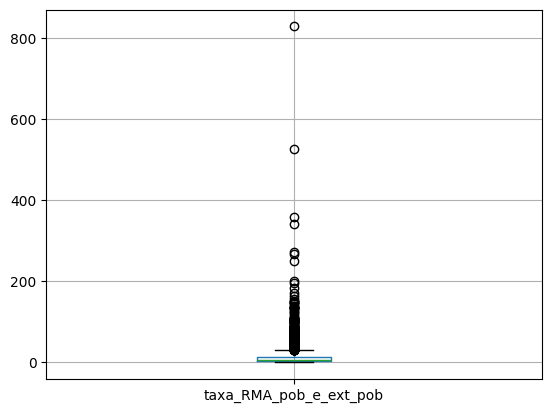

In [137]:
dados[['taxa_RMA_pob_e_ext_pob']].boxplot()


In [138]:
indice_max = dados['taxa_RMA_pob_e_ext_pob'].idxmax()
linha_max = dados['taxa_RMA_pob_e_ext_pob'].loc[indice_max]
linha_max

827.6562500000001

In [139]:
maiores_valores = dados['taxa_RMA_pob_e_ext_pob'].nlargest(10)
menores_valores = dados['taxa_RMA_pob_e_ext_pob'].nsmallest(10)

In [140]:
maiores_valores

5045    827.656250
4938    525.000000
4683    357.297297
4972    340.612245
5008    272.000000
4472    267.051282
3619    249.787234
4880    200.000000
4919    196.106870
5009    182.666667
Name: taxa_RMA_pob_e_ext_pob, dtype: float64

In [141]:
menores_valores

1709    0.061973
511     0.064280
646     0.082092
166     0.092539
477     0.101853
1545    0.103578
1699    0.105846
222     0.113502
628     0.131066
484     0.132840
Name: taxa_RMA_pob_e_ext_pob, dtype: float64

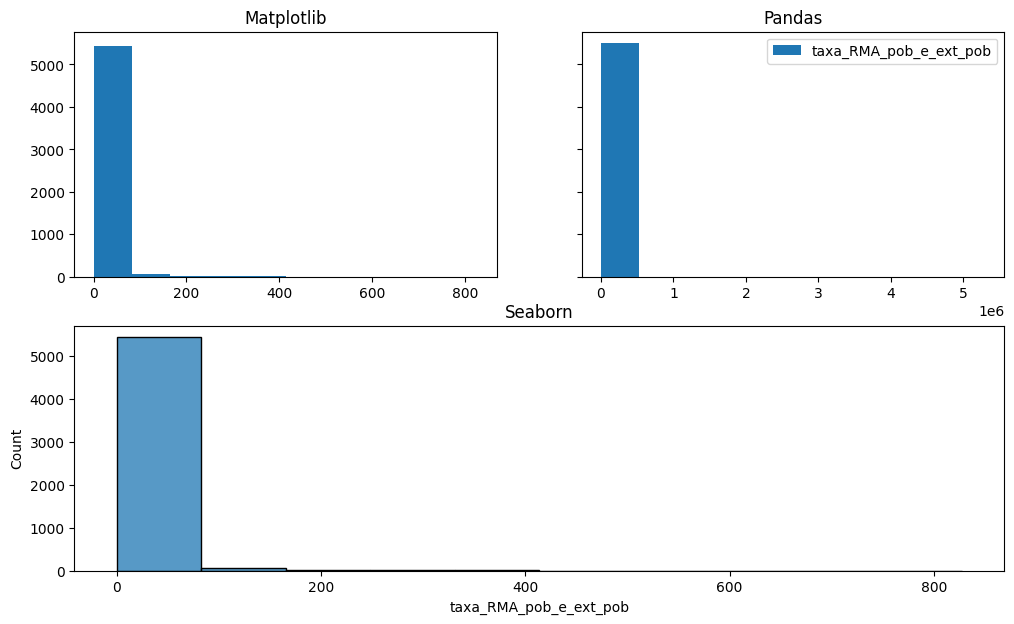

In [142]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=dados['taxa_RMA_pob_e_ext_pob']);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
dados.plot.hist(column='taxa_RMA_pob_e_ext_pob', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=dados, x='taxa_RMA_pob_e_ext_pob', 
             multiple='stack', bins=10, ax=ax3);
             

In [145]:
dados['indice'] = pd.cut(dados['taxa_RMA_pob_e_ext_pob'], bins = [0, 5, 10, 15, 20, 25, 30, 40, 45, 50,55,850])

In [146]:
indice_11c = dados['indice'].value_counts()
indice_11c = pd.DataFrame(indice_11c).sort_values(by='indice')
indice_11c 

,count
indice,
"(0, 5]",2324
"(5, 10]",1232
"(10, 15]",673
"(15, 20]",431
"(20, 25]",242
"(25, 30]",170
"(30, 40]",181
"(40, 45]",59
"(45, 50]",31


In [147]:
df_indice_RMA = indice_11c.reset_index(drop=False).copy()
df_indice_RMA

,indice,count
0,"(0, 5]",2324
1,"(5, 10]",1232
2,"(10, 15]",673
3,"(15, 20]",431
4,"(20, 25]",242
5,"(25, 30]",170
6,"(30, 40]",181
7,"(40, 45]",59
8,"(45, 50]",31
9,"(50, 55]",23


In [148]:
df_indice_RMA['Classe'] = [1,2,3,4,5,6,7,8,9,10,11]
df_indice_RMA

,indice,count,Classe
0,"(0, 5]",2324,1
1,"(5, 10]",1232,2
2,"(10, 15]",673,3
3,"(15, 20]",431,4
4,"(20, 25]",242,5
5,"(25, 30]",170,6
6,"(30, 40]",181,7
7,"(40, 45]",59,8
8,"(45, 50]",31,9
9,"(50, 55]",23,10


C:\Users\aline\AppData\Local\Temp\ipykernel_8584\2411654547.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-5','5-10','15-20','25-30','35-40','45-50'],


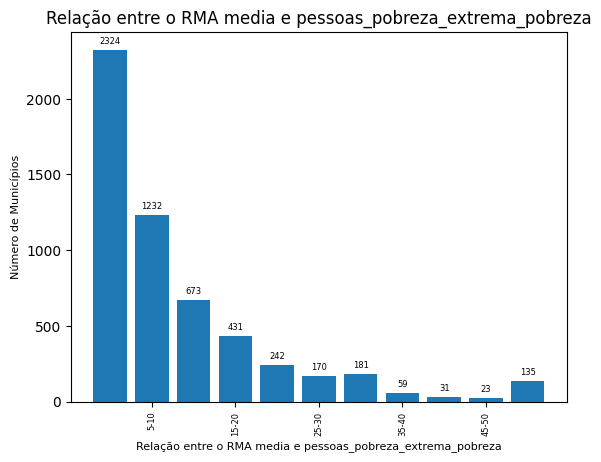

In [149]:
fig10c, ax = plt.subplots()

X = df_indice_RMA['Classe']
Y = df_indice_RMA['count']
bars = ax.bar(X, Y)

plt.title('Relação entre o RMA media e pessoas_pobreza_extrema_pobreza')

ax.set_xlabel('Relação entre o RMA media e pessoas_pobreza_extrema_pobreza', fontsize=8)
ax.set_ylabel('Número de Municípios', fontsize=8)

ax.set_xticklabels(['0-5','5-10','15-20','25-30','35-40','45-50'],
                   rotation=90, fontsize=6)

# Adicione etiquetas em todas as barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Deslocamento vertical das etiquetas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6
               )
plt.xticks(rotation=90, fontsize=6)

plt.show()


In [179]:
dados.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,indice
4938,São Domingos do Sul,4318051,462.0,42.0,8,Pequeno I,525.000000,"(55, 850]"
5009,Três Arroios,4321634,329.0,27.4,15,Pequeno I,182.666667,"(55, 850]"
4819,Montauri,4312351,257.0,21.4,20,Pequeno I,107.000000,"(55, 850]"
4729,Fagundes Varela,4307864,304.0,25.3,24,Pequeno I,105.416667,"(55, 850]"
4880,Poço Das Antas,4314753,600.0,50.0,25,Pequeno I,200.000000,"(55, 850]"
...,...,...,...,...,...,...,...,...
2158,Salvador,2927408,102224.0,8518.7,755360,Metrópole,1.127767,"(0, 5]"
111,Manaus,1302603,350503.0,29208.6,759304,Metrópole,3.846760,"(0, 5]"
946,Fortaleza,2304400,738816.0,61568.0,884975,Metrópole,6.957033,"(5, 10]"
3235,Rio de Janeiro,3304557,1455179.0,121264.9,1469913,Metrópole,8.249801,"(5, 10]"


In [247]:
dados[(dados['ibge_7']==5300108)]

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,indice
5516,Brasília,5300108,300262.0,27296.5,500738,Metrópole,5.451254,"(5, 10]"


In [248]:
dados[(dados['ibge_7']==1100015)]

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,indice
0,Alta Floresta D´oeste,1100015,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]"


In [249]:
dadosPorte=pd.merge(dados,df_indice_RMA, how='inner')
dadosPorte=dadosPorte.drop(columns={'count'}).rename(columns={'indice':'faixa'})
dadosPorte

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
0,Alta Floresta D´oeste,1100015,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]",5
1,Corumbiara,1100072,4397.0,366.4,1494,Pequeno I,24.524766,"(20, 25]",5
2,Ji-paraná,1100122,54012.0,4501.0,18107,Grande,24.857790,"(20, 25]",5
3,Alto Alegre Dos Parecis,1100379,7344.0,612.0,2449,Pequeno I,24.989792,"(20, 25]",5
4,Theobroma,1101609,5108.0,425.7,2101,Pequeno I,20.261780,"(20, 25]",5
...,...,...,...,...,...,...,...,...,...
5496,Itaara,4310538,3984.0,332.0,604,Pequeno I,54.966887,"(50, 55]",10
5497,Ivorá,4310751,1907.0,158.9,312,Pequeno I,50.929487,"(50, 55]",10
5498,Marques de Souza,4312054,1601.0,133.4,259,Pequeno I,51.505792,"(50, 55]",10
5499,São Pedro da Serra,4319356,348.0,29.0,56,Pequeno I,51.785714,"(50, 55]",10


In [252]:
dadosPorteMetropole=dadosPorte[(dadosPorte['porte']=='Metrópole')]
dadosPorteMetropole.head()

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
120,Curitiba,4106902,508362.0,42363.5,174070,Metrópole,24.337048,"(20, 25]",5
343,São Luís,2111300,300974.0,25081.2,352623,Metrópole,7.112752,"(5, 10]",2
420,Fortaleza,2304400,738816.0,61568.0,884975,Metrópole,6.957033,"(5, 10]",2
539,Recife,2611606,245133.0,20427.8,388586,Metrópole,5.256957,"(5, 10]",2
548,Maceió,2704302,222994.0,18582.8,266438,Metrópole,6.974531,"(5, 10]",2


        faixa  count
0      (0, 5]      6
1     (5, 10]      9
2    (10, 15]      1
3    (15, 20]      0
4    (20, 25]      1
5    (25, 30]      0
6    (30, 40]      0
7    (40, 45]      0
8    (45, 50]      0
9    (50, 55]      0
10  (55, 850]      0


<Axes: xlabel='faixa', ylabel='count'>

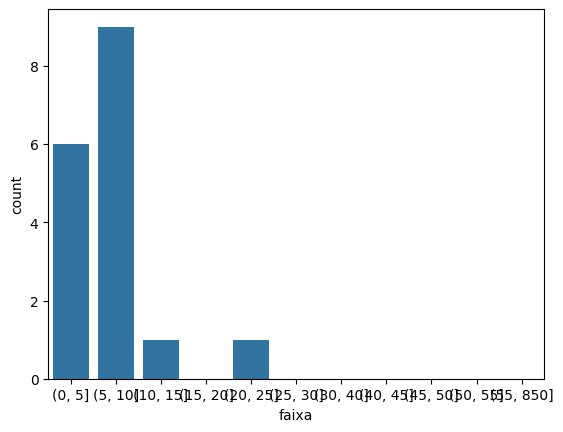

In [253]:
dadosPorteMetropole=dadosPorte[(dadosPorte['porte']=='Metrópole')]
dadosPorteMetropole.head()

Metropole = dadosPorteMetropole['faixa'].value_counts()
Metropole = pd.DataFrame(Metropole).sort_values(by=['faixa'])
df_indice_Metropole = Metropole.reset_index(drop=False).copy()
print(df_indice_Metropole)
sns.barplot(data = df_indice_Metropole, y = 'count', x = 'faixa')

In [255]:
dadosPorteGrande=dadosPorte[(dadosPorte['porte']=='Grande')]
dadosPorteGrande.head()


,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
2,Ji-paraná,1100122,54012.0,4501.0,18107,Grande,24.857790,"(20, 25]",5
44,Sabará,3156700,75156.0,6263.0,26801,Grande,23.368531,"(20, 25]",5
48,Uberlândia,3170206,215039.0,17919.9,80402,Grande,22.287878,"(20, 25]",5
51,Barra Mansa,3300407,101191.0,8432.6,38174,Grande,22.089904,"(20, 25]",5
57,Americana,3501608,51400.0,4283.3,20881,Grande,20.512906,"(20, 25]",5


        faixa  count
0      (0, 5]     86
1     (5, 10]     86
2    (10, 15]     36
3    (15, 20]     23
4    (20, 25]     17
5    (25, 30]      8
6    (30, 40]      6
7    (40, 45]      2
8    (45, 50]      1
9    (50, 55]      0
10  (55, 850]      1


<Axes: xlabel='faixa', ylabel='count'>

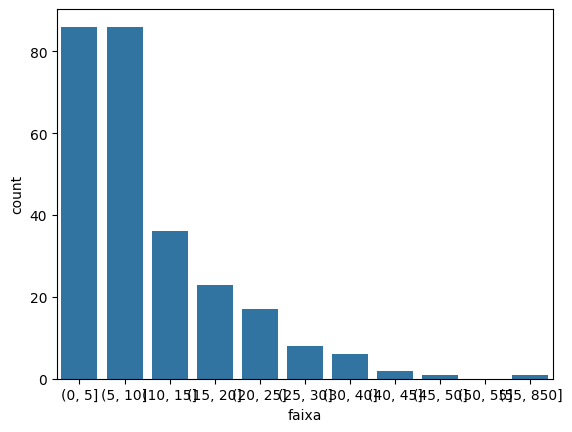

In [257]:
Grande = dadosPorteGrande['faixa'].value_counts()
Grande = pd.DataFrame(Grande).sort_values(by=['faixa'])
df_indice_Grande = Grande.reset_index(drop=False).copy()
print(df_indice_Grande)
sns.barplot(data = df_indice_Grande, y = 'count', x ='faixa')

In [259]:
dadosPorteMedio=dadosPorte[(dadosPorte['porte']=='Médio')]
dadosPorteMedio.head()

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
35,Leopoldina,3138401,28812.0,2401.0,10606,Médio,22.638129,"(20, 25]",5
70,Itapeva,3522406,49678.0,4139.8,18717,Médio,22.117861,"(20, 25]",5
72,Jaboticabal,3524303,41339.0,3444.9,13988,Médio,24.627538,"(20, 25]",5
79,Olímpia,3533908,31026.0,2585.5,10539,Médio,24.532688,"(20, 25]",5
92,São João da Boa Vista,3549102,17271.0,1439.2,6728,Médio,21.391201,"(20, 25]",5


        faixa  count
0      (0, 5]    176
1     (5, 10]     70
2    (10, 15]     28
3    (15, 20]     18
4    (20, 25]     11
5    (25, 30]      8
6    (30, 40]      6
7    (40, 45]      5
8    (45, 50]      2
9    (50, 55]      0
10  (55, 850]      0


<Axes: xlabel='faixa', ylabel='count'>

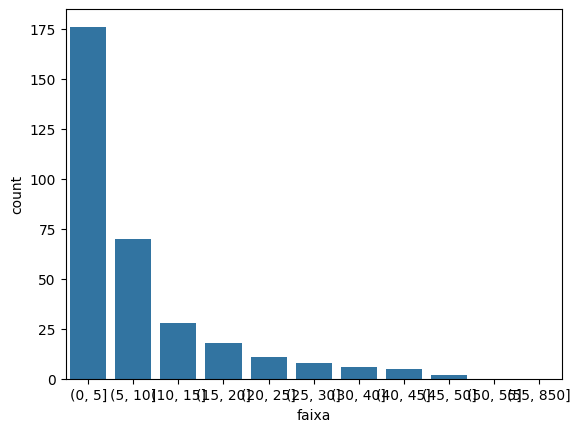

In [261]:
Medio = dadosPorteMedio['faixa'].value_counts()
Medio = pd.DataFrame(Medio).sort_values(by=['faixa'])
df_indice_Medio = Medio.reset_index(drop=False).copy()
print(df_indice_Medio)
sns.barplot(data = df_indice_Medio, y = 'count', x ='faixa')

In [262]:
dadosPortePequenoI=dadosPorte[(dadosPorte['porte']=='Pequeno I')]
dadosPortePequenoI.head()

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
1,Corumbiara,1100072,4397.0,366.4,1494,Pequeno I,24.524766,"(20, 25]",5
3,Alto Alegre Dos Parecis,1100379,7344.0,612.0,2449,Pequeno I,24.989792,"(20, 25]",5
4,Theobroma,1101609,5108.0,425.7,2101,Pequeno I,20.261780,"(20, 25]",5
5,Crixás do Tocantins,1706258,1185.0,98.8,448,Pequeno I,22.053571,"(20, 25]",5
6,Monte Santo do Tocantins,1713700,3207.0,267.2,1190,Pequeno I,22.453782,"(20, 25]",5


        faixa  count
0      (0, 5]   1435
1     (5, 10]    897
2    (10, 15]    493
3    (15, 20]    334
4    (20, 25]    184
5    (25, 30]    135
6    (30, 40]    151
7    (40, 45]     48
8    (45, 50]     25
9    (50, 55]     21
10  (55, 850]    132


<Axes: xlabel='faixa', ylabel='count'>

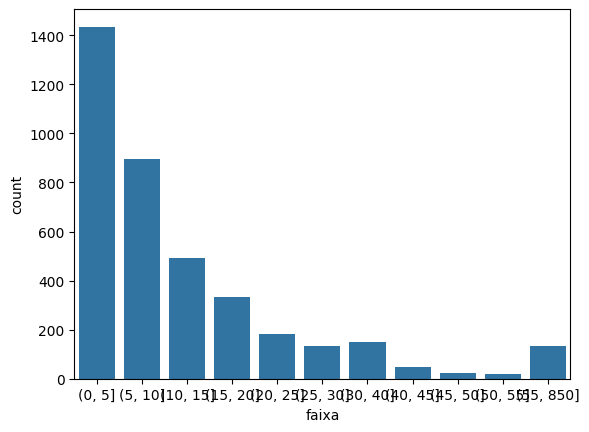

In [263]:
PequenoI= dadosPortePequenoI['faixa'].value_counts()
PequenoI = pd.DataFrame(PequenoI).sort_values(by=['faixa'])
df_indice_PequenoI = PequenoI.reset_index(drop=False).copy()
print(df_indice_PequenoI)
sns.barplot(data = df_indice_PequenoI, y = 'count', x ='faixa')

In [265]:
dadosPortePequenoII=dadosPorte[(dadosPorte['porte']=='Pequeno II')]
dadosPortePequenoII.head()

,municipio_aj,ibge_7,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,porte,taxa_RMA_pob_e_ext_pob,faixa,Classe
0,Alta Floresta D´oeste,1100015,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]",5
9,Além Paraíba,3101508,24606.0,2050.5,9286,Pequeno II,22.081628,"(20, 25]",5
20,Capelinha,3112307,30312.0,2526.0,11825,Pequeno II,21.361522,"(20, 25]",5
33,Iturama,3134400,26735.0,2227.9,11134,Pequeno II,20.009880,"(20, 25]",5
50,Santa Teresa,3204609,9358.0,779.8,3265,Pequeno II,23.883614,"(20, 25]",5


        faixa  count
0      (0, 5]    621
1     (5, 10]    170
2    (10, 15]    115
3    (15, 20]     56
4    (20, 25]     29
5    (25, 30]     19
6    (30, 40]     18
7    (40, 45]      4
8    (45, 50]      3
9    (50, 55]      2
10  (55, 850]      2


<Axes: xlabel='faixa', ylabel='count'>

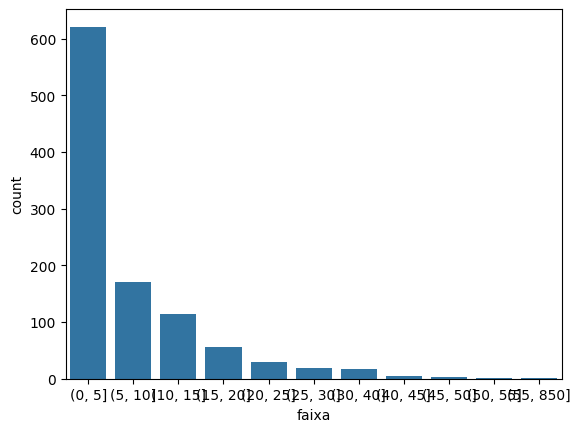

In [266]:
PequenoII= dadosPortePequenoII['faixa'].value_counts()
PequenoII = pd.DataFrame(PequenoII).sort_values(by=['faixa'])
df_indice_PequenoII = PequenoII.reset_index(drop=False).copy()
print(df_indice_PequenoII)
sns.barplot(data = df_indice_PequenoII, y = 'count', x ='faixa')